# Roadmap

In [ ]:
# First I will use sales-only data to forecast demand. I will train with the training set,
# then predict and score using the test set.
# Then I will add in promotional info and do regression with ARIMA and neural networks

1. Get data
2. Create train-test split
3. Clean training set (write functions): missing values, text, categorical attributes, scaling
4. Select models and scoring metrics, then train
5. Compare them: clean test set, make predictions, score
6. Fine-tune models

## 1. Load data

In [1]:
import pandas as pd

data_df = pd.read_excel('data/time_series.xlsx', index_col='EntDate')
data_df.head()

,012,017,03008944ST-1,03008944ST-3,0300ST1550-1,0300ST15X9-1,0300ST15X9-2,0300ST15X9-3,0300ST1605-1,0300ST1605-2,...,9920-2,9920-3,9920-4,9920-5,9920-6,9920-7,9997-25,HW220D15,HW240DIA,TRUHONE
EntDate,,,,,,,,,,,,,,,,,,,,,
2012-04-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-15,0,0,0,0,0,0,0,0,0,0,...,20,19,7,166,98,0,0,0,0,0
2012-04-22,0,0,0,0,0,0,0,0,0,0,...,41,15,10,207,87,0,0,0,0,0
2012-04-29,0,0,0,0,0,0,0,0,0,0,...,38,44,13,101,21,10,0,0,0,0
2012-05-06,0,0,0,0,0,0,0,0,0,0,...,29,47,21,75,43,0,0,0,0,0


## 2. Train-Test Split

In [2]:
import matplotlib.pyplot as plt
# splitting into training and testing sets using 66-34
X = data_df.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 292
Training Observations: 192
Testing Observations: 100


In [3]:
# made train_df and test_df (the latter to be used later)
train_df = data_df[0:192]
test_df = data_df[192:292]
train_df.head()

,012,017,03008944ST-1,03008944ST-3,0300ST1550-1,0300ST15X9-1,0300ST15X9-2,0300ST15X9-3,0300ST1605-1,0300ST1605-2,...,9920-2,9920-3,9920-4,9920-5,9920-6,9920-7,9997-25,HW220D15,HW240DIA,TRUHONE
EntDate,,,,,,,,,,,,,,,,,,,,,
2012-04-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-15,0,0,0,0,0,0,0,0,0,0,...,20,19,7,166,98,0,0,0,0,0
2012-04-22,0,0,0,0,0,0,0,0,0,0,...,41,15,10,207,87,0,0,0,0,0
2012-04-29,0,0,0,0,0,0,0,0,0,0,...,38,44,13,101,21,10,0,0,0,0
2012-05-06,0,0,0,0,0,0,0,0,0,0,...,29,47,21,75,43,0,0,0,0,0


## Select single item for forecasting

In [ ]:
test = train_df['9920-2']
test.head()

In [ ]:
# then plotting it using different colors
plt.figure(figsize=(8,4))
plt.plot(train_df.index, train_df['9920-2'], label='Train')
plt.plot(test_df.index,test_df['9920-2'], label='Test')
plt.legend(loc='best')
plt.title("Train-Test Split")
plt.show()

## 3. Clean Training Set

In [ ]:
# make a copy first

In [ ]:
# make transformations pipeline (first applied to train, then apply to test)
# luckily, our data has no null values, no categorical/text values
# however, to get the initial messy excel sheet into timeseries format was not easy
# describe

## 4. Select Models and Scoring Metrics

We are comparing different forecasting models on the same data, so we can use scale-dependent errors because our single dataset only has one scale. We will use two metrics: <br>
* MAD (also called MAE): $\frac{|A_t-F_t|}{n}$ <br>
* RMSE (root mean squared error): $\sqrt{\frac{(A_t-F_t)^2}{n}}$ <br>

For baseline, we will use:
* naive forecast ("only yesterday matters")

Then we will try two simple forecasts:
* cumulative ("history matters")
* moving average ("I select how much matters")

We will also try:
* ARIMA
* exponential smoothing

In [ ]:
# to select proper exponential smoothing method, we must decompose the time series first

### Naive Forecast (Baseline)

In [7]:
import numpy as np

dd= np.asarray(train_df['9920-2'])
y_hat = test_df.copy()
y_hat['naive'] = dd[len(dd)-1] # this line of code is for one-time forecast
plt.figure(figsize=(8,4))

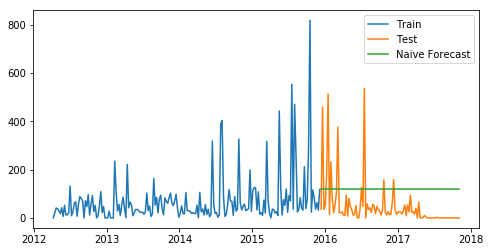

In [8]:
from functions import plot_time_series
plot_time_series(train_df, test_df, '9920-2', y_hat, 'naive', 'Naive Forecast')

In [ ]:
# calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.naive))
print(rms)

In [ ]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.naive)
print(mad)

### Cumulative

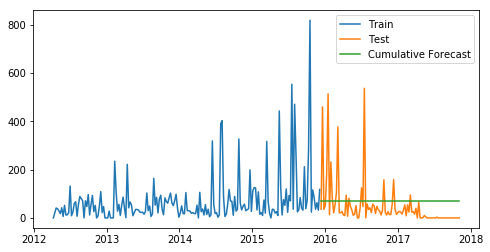

In [9]:
y_hat['cumulative'] = train_df['9920-2'].mean()
plot_time_series(train_df, test_df, '9920-2', y_hat, 'cumulative', 'Cumulative Forecast')

In [ ]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.cumulative))
print(rms)

In [ ]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.cumulative)
print(mad)

### Moving Average

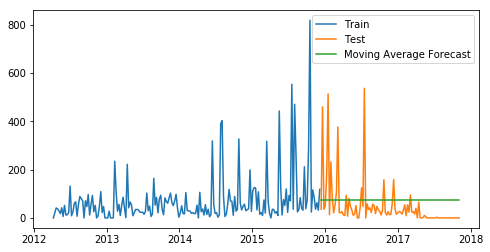

In [10]:
# since forecasts are for an entire year, we are using 52 weeks
y_hat['moving_avg'] = train_df['9920-2'].rolling(156).mean().iloc[-1]
plot_time_series(train_df, test_df, '9920-2', y_hat, 'moving_avg', 'Moving Average Forecast')

In [ ]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.moving_avg))
print(rms)

In [ ]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.moving_avg)
print(mad)

### S/ARIMA

In [ ]:
from pyramid.arima import ARIMA

fit = ARIMA(order=(1, 1, 0), seasonal_order=(1, 0, 0, 12)).fit(y=train_df['9920-2'])

# fitting a stepwise model:
from pyramid.arima import auto_arima

stepwise_fit = auto_arima(train_df['9920-2'], start_p=0, start_q=0, max_p=6, max_q=6, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

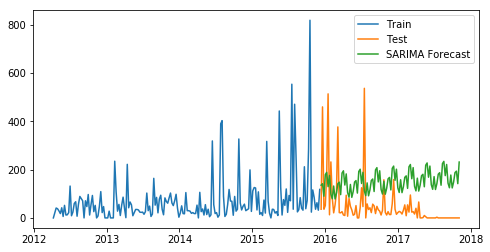

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

fit1 = SARIMAX(train_df['9920-2'], order=(0, 1, 1), seasonal_order=(0,1,1,12), freq='W').fit()
y_hat['SARIMA'] = fit1.predict(start="2015-12-13", end="2017-11-05", dynamic=True, typ='levels')

plot_time_series(train_df, test_df, '9920-2', y_hat, 'SARIMA', 'SARIMA Forecast')

In [ ]:
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.SARIMA))
print(rms)

### Exponential Smoothing

In [ ]:
# let's decompose it first to see trend, seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
series = train_df['9920-2']
result_a = seasonal_decompose(series, model='additive')
result_a.plot()
plt.show()

In [ ]:
# let's plot it a bit bigger
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(16,10))
result_a.trend.plot(ax=ax1, label='Trend')
result_a.seasonal.plot(ax=ax2)
result_a.resid.plot(ax=ax3)
plt.show()

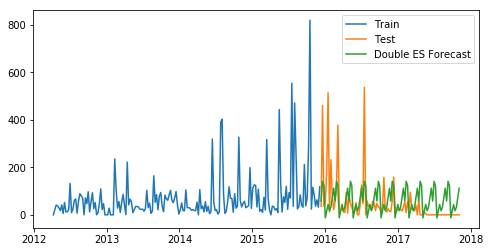

In [12]:
# no trend, just seasonality (multiplicative), no damping
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train_df['9920-2']), seasonal_periods=10, trend=None, seasonal='additive').fit(smoothing_level=0.51, smoothing_seasonal=0.1)
y_hat['DES'] = fit1.forecast(len(test_df))

plot_time_series(train_df, test_df, '9920-2', y_hat, 'DES', 'Double ES Forecast')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.DES))
print(rms)

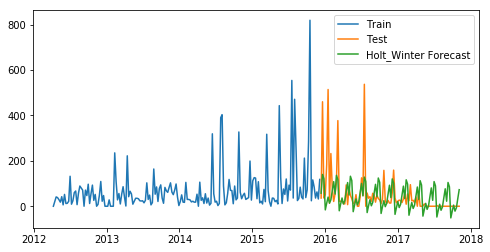

In [13]:
# here we have trend and seasonality, so we will use Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train_df['9920-2']), seasonal_periods=10, trend='add', seasonal='add').fit(smoothing_level=0.51, smoothing_slope=0.015,smoothing_seasonal=0.1)
y_hat['Holt_Winter'] = fit1.forecast(len(test_df))

plot_time_series(train_df, test_df, '9920-2', y_hat, 'Holt_Winter', 'Holt_Winter Forecast')

In [ ]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.Holt_Winter))
print(rms)

In [ ]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.Holt_Winter)
print(mad)

### Prophet

In [14]:
# imports 
from fbprophet import Prophet

In [15]:
# prophet requires the variable names in the time series to be
# y for target and ds for Datetime
training = pd.DataFrame(train_df['9920-2'].copy())
training['ds'] = training.index
training['y'] = training['9920-2']
training.drop(['9920-2'],axis = 1, inplace = True)

In [16]:
training.head()

,ds,y
EntDate,,
2012-04-08,2012-04-08,0
2012-04-15,2012-04-15,20
2012-04-22,2012-04-22,41
2012-04-29,2012-04-29,38
2012-05-06,2012-05-06,29


In [17]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(growth='linear', interval_width=0.95, weekly_seasonality=True)
my_model.fit(training)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/andreafabry/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [18]:
future_dates = my_model.make_future_dataframe(periods=100, freq='W')
future_dates.head()
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
287,2017-10-08,212.203626,33.231954,387.764193
288,2017-10-15,259.776269,86.918520,438.608173
289,2017-10-22,255.874577,69.877538,432.000062
290,2017-10-29,205.772771,32.411636,377.930156
291,2017-11-05,152.861748,-5.388271,324.349471


In [19]:
forecast.head()
forecast = forecast.set_index('ds')
forecast_slice=forecast[192:292]
forecast_df = forecast_slice["yhat"]
forecast_df.head()

ds
2015-12-13    107.174022
2015-12-20    111.567014
2015-12-27    112.039484
2016-01-03    101.748567
2016-01-10     88.797489
Name: yhat, dtype: float64

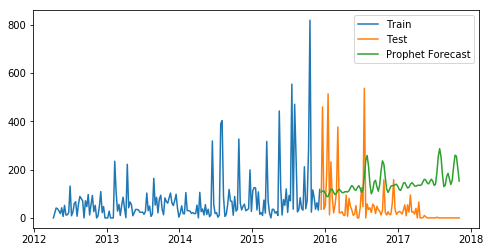

In [20]:
plot_time_series(train_df, test_df, '9920-2', forecast_slice, 'yhat', 'Prophet Forecast')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_df['9920-2'], forecast_slice['yhat']))
print(rms)

## Resources

Great basic blogs on time series and forecasting methods: https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

On Prophet:
https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/
https://research.fb.com/prophet-forecasting-at-scale/
(Plus see 